# Introduction_MAP

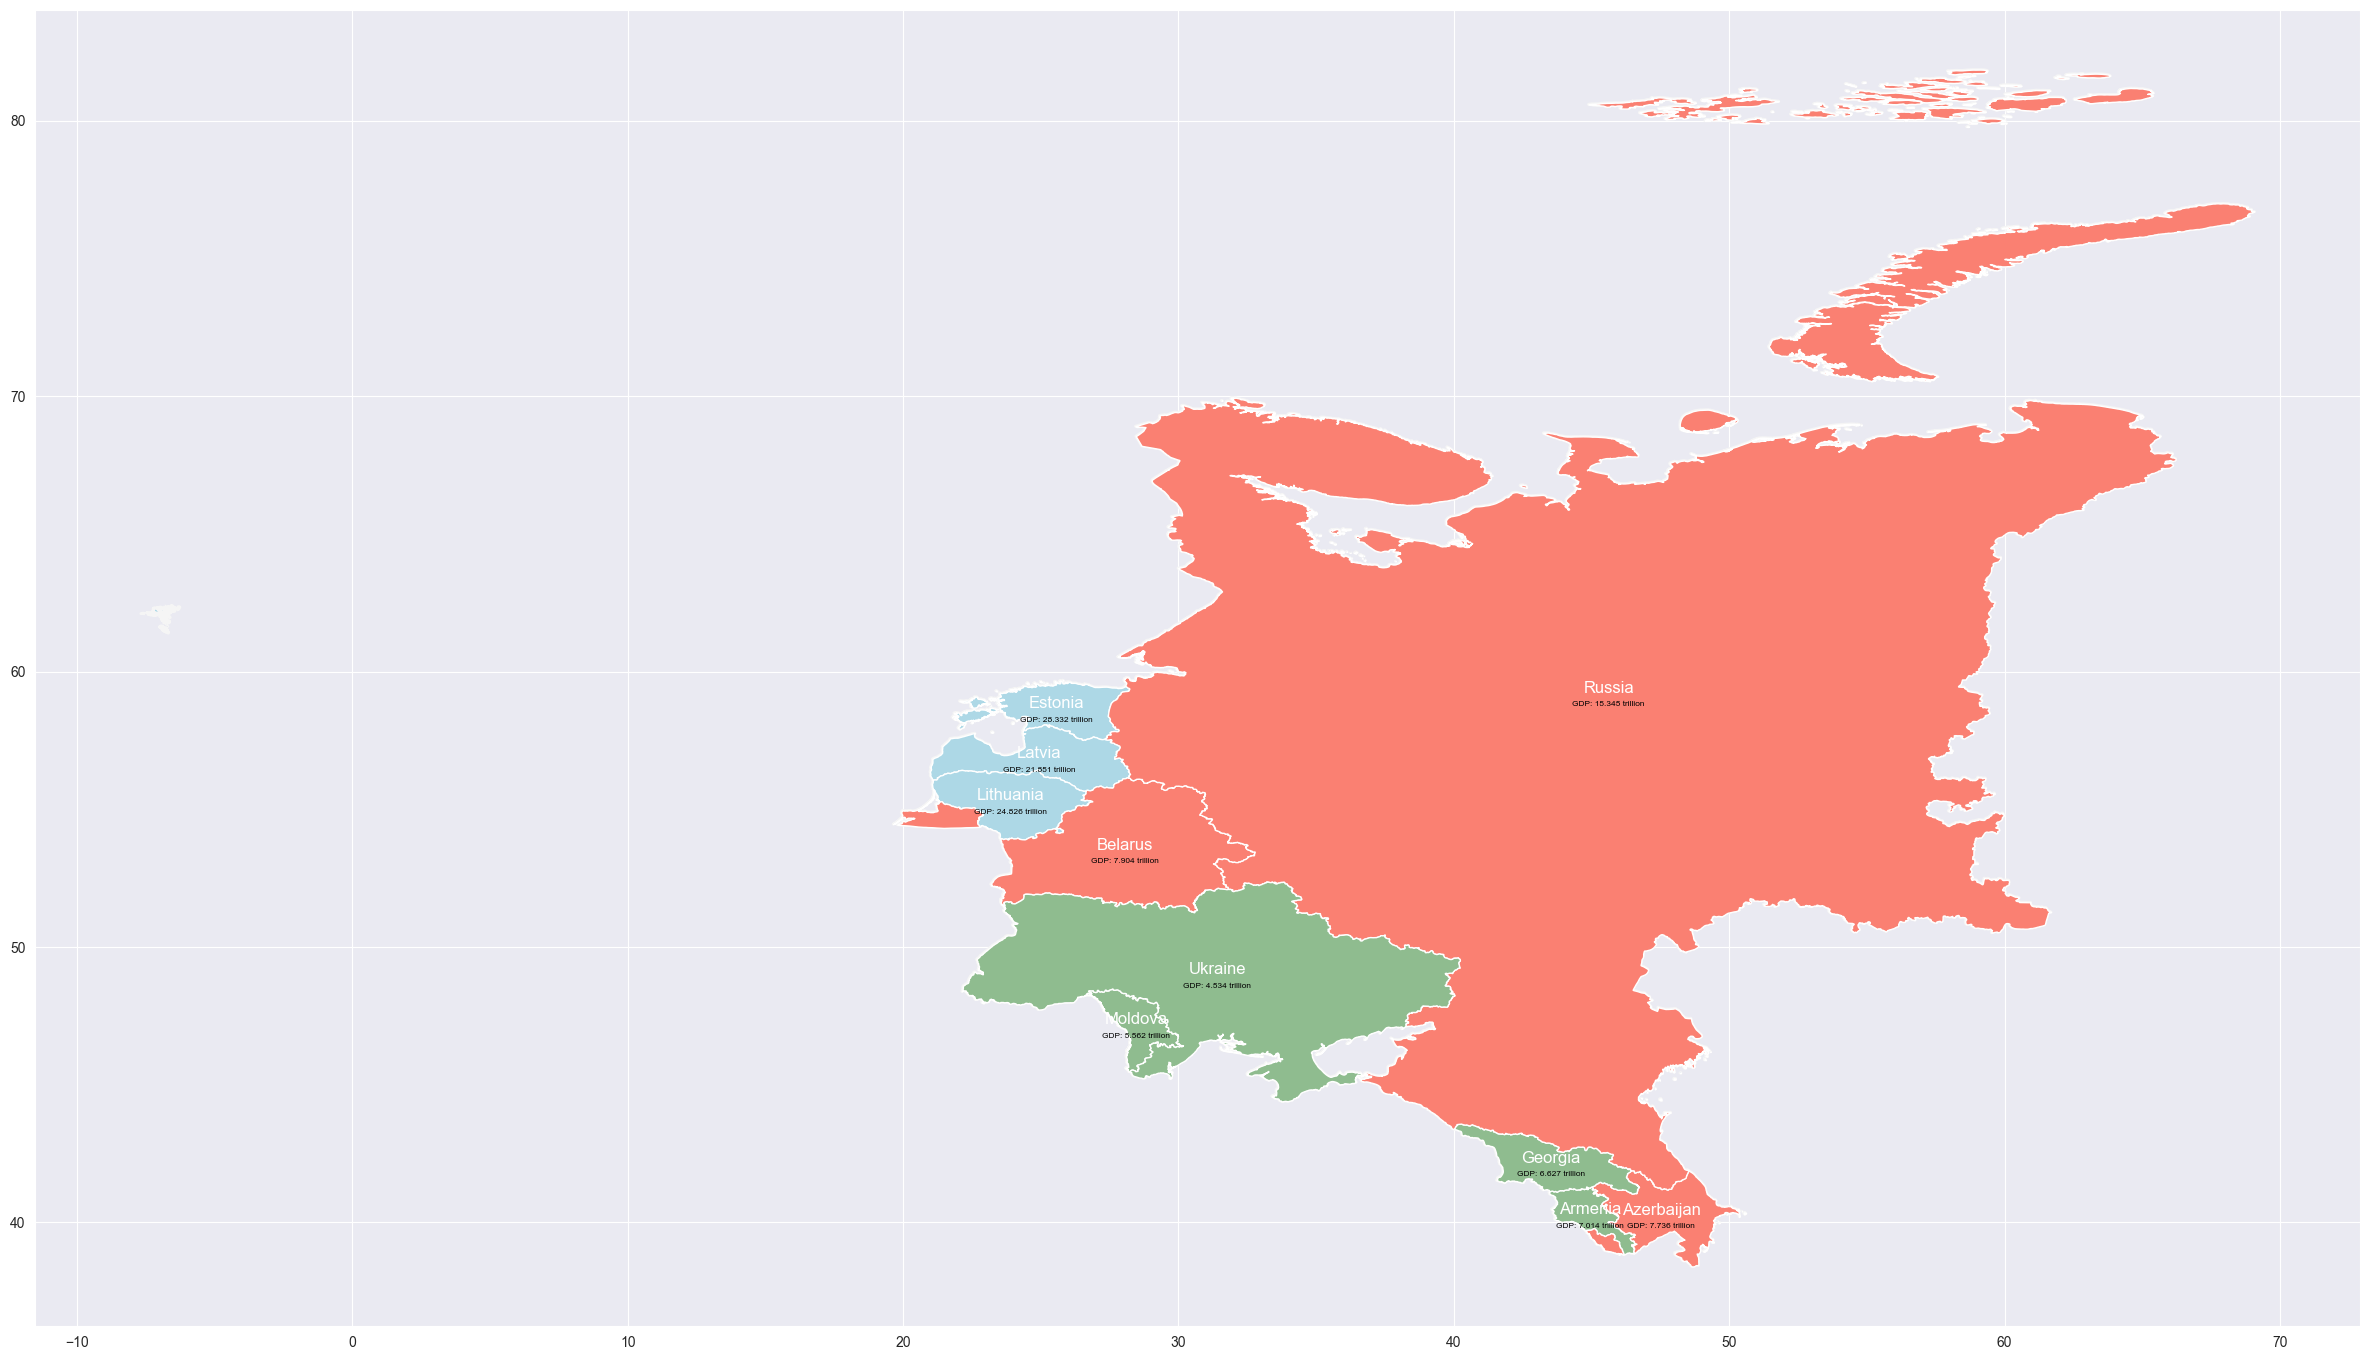

In [244]:

import pandas as pd
import numpy as np
import math
import geopandas as gpd
import matplotlib.pyplot as plt
shapefile = gpd.read_file("../data/Euro/Europe.shp")


gdp_data = {
    "Estonia": 28.332,
    "Latvia": 21.851,
    "Lithuania": 24.826,
    "Armenia": 7.014,
    "Azerbaijan": 7.736,
    "Belarus": 7.904,
    "Georgia": 6.627,
    "Moldova": 5.562,
    "Russia": 15.345,
    "Ukraine": 4.534
}


color_mapping = {
    "Estonia": 'lightblue',
    "Latvia": 'lightblue',
    "Lithuania": 'lightblue',
    "Armenia": 'darkseagreen',
    "Azerbaijan": 'salmon',
    "Belarus": 'salmon',
    "Georgia": 'darkseagreen',
    "Moldova": 'darkseagreen',
    "Russia": 'salmon',
    "Ukraine": 'darkseagreen'
}

shapefile = shapefile.set_index('NAME')


fig, ax = plt.subplots(figsize=(30, 30))

countries_to_exclude = ["Albania", "Andorra", "Austria", "Belgium", "Bosnia Herzegovina", "Croatia", "Czech Republic", "Denmark", "Finland", "France", "Germany", "Gibraltar (UK)", "Greece", "Guernsey (UK)", "Hungary", "Ireland", "Isle of Man (UK)", "Italy", "Jersey (UK)", "Liechtenstein", "Luxembourg", "Macedonia", "Malta", "Monaco", "Montenegro", "Netherlands", "Norway", "Poland", "Portugal", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "United Kingdom", "Bulgaria", "Faroe Islands (Denmark)", "Iceland", "Jan Mayen (Norway)", "Romania", "Svalbard (Norway)", "Turkey"]


shapefile[~shapefile.index.isin(countries_to_exclude)].plot(ax=ax, color='lightblue', edgecolor="whitesmoke", linewidth=2)



for country, color in color_mapping.items():
    shape = shapefile.loc[country, 'geometry']
    if not shape.is_empty:
        if shape.geom_type == 'Polygon':
            gpd.GeoSeries([shape]).plot(ax=ax, color=color)
        elif shape.geom_type == 'MultiPolygon':
            for geom in shape.geoms:
                gpd.GeoSeries([geom]).plot(ax=ax, color=color)


for country, color in color_mapping.items():
    gdp_value = gdp_data.get(country, 0)
    coordinates = shapefile.loc[country, 'geometry'].centroid.coords[0]
    country_x, country_y = coordinates


    ax.annotate(text=country, xy=(country_x, country_y), color='white', fontsize=12, ha='center')
    ax.annotate(text=f"GDP: {gdp_value} trillion", xy=(country_x, country_y - 0.5), color='black', fontsize=6, ha='center')

plt.show()

# Data filtering

In [245]:
import numpy as np
import pandas as pd
belarus = pd.read_excel(r"../data/belarus.xlsx")
estonia = pd.read_excel(r"../data/estonia.xlsx")

In [246]:
belarus

,ccode,cname,year,ccode_qog,cname_qog,ccodealp,ccodecow,version,cname_year,ccodealp_year,...,yri_fem40,yri_fem4160,yri_fem61,yri_meanage,yri_medianage,yri_mp30,yri_mp35,yri_mp40,yri_mp4160,yri_mp61
0,112,Belarus,1992,112,Belarus,BLR,370.0,QoGStdTSjan23,Belarus 1992,BLR92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,112,Belarus,1993,112,Belarus,BLR,370.0,QoGStdTSjan23,Belarus 1993,BLR93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,112,Belarus,1994,112,Belarus,BLR,370.0,QoGStdTSjan23,Belarus 1994,BLR94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,112,Belarus,1995,112,Belarus,BLR,370.0,QoGStdTSjan23,Belarus 1995,BLR95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,112,Belarus,1996,112,Belarus,BLR,370.0,QoGStdTSjan23,Belarus 1996,BLR96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,112,Belarus,1997,112,Belarus,BLR,370.0,QoGStdTSjan23,Belarus 1997,BLR97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,112,Belarus,1998,112,Belarus,BLR,370.0,QoGStdTSjan23,Belarus 1998,BLR98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,112,Belarus,1999,112,Belarus,BLR,370.0,QoGStdTSjan23,Belarus 1999,BLR99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,112,Belarus,2000,112,Belarus,BLR,370.0,QoGStdTSjan23,Belarus 2000,BLR00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,112,Belarus,2001,112,Belarus,BLR,370.0,QoGStdTSjan23,Belarus 2001,BLR01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
estonia

,ccode,cname,year,ccode_qog,cname_qog,ccodealp,ccodecow,version,cname_year,ccodealp_year,...,yri_fem40,yri_fem4160,yri_fem61,yri_meanage,yri_medianage,yri_mp30,yri_mp35,yri_mp40,yri_mp4160,yri_mp61
0,233,Estonia,1992,233,Estonia,EST,366.0,QoGStdTSjan23,Estonia 1992,EST92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,233,Estonia,1993,233,Estonia,EST,366.0,QoGStdTSjan23,Estonia 1993,EST93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,233,Estonia,1994,233,Estonia,EST,366.0,QoGStdTSjan23,Estonia 1994,EST94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,233,Estonia,1995,233,Estonia,EST,366.0,QoGStdTSjan23,Estonia 1995,EST95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,233,Estonia,1996,233,Estonia,EST,366.0,QoGStdTSjan23,Estonia 1996,EST96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,233,Estonia,1997,233,Estonia,EST,366.0,QoGStdTSjan23,Estonia 1997,EST97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,233,Estonia,1998,233,Estonia,EST,366.0,QoGStdTSjan23,Estonia 1998,EST98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,233,Estonia,1999,233,Estonia,EST,366.0,QoGStdTSjan23,Estonia 1999,EST99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,233,Estonia,2000,233,Estonia,EST,366.0,QoGStdTSjan23,Estonia 2000,EST00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,233,Estonia,2001,233,Estonia,EST,366.0,QoGStdTSjan23,Estonia 2001,EST01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
variables_chart = pd.read_csv(r"../data/list_of_variables.csv")
variables_chart

,variable_code,variable_name
0,wdi_gdpcapcur,GDP per capita (current US dollar)
1,eu_demd2jant,"Population at 1st January, Total"
2,bti_ds,Democracy status
3,cpds_tg,Type of government
4,fh_feb,Freedom of expression
5,hum_satdem,Satisfaction with Democracy Index
6,lis_gini,Gini coefficient
7,bti_ep,Economic performance
8,bti_mes,Economy status
9,fi_index,Economic freedom of the world index


In [249]:
variables_list = variables_chart["variable_code"].values.tolist()
variables_namelist = variables_chart["variable_name"].values.tolist()

In [250]:
belarus_filtered = belarus[variables_list]
estonia_filtered = estonia[variables_list]
belarus_filtered.columns = variables_namelist
estonia_filtered.columns = variables_namelist
belarus_filtered["year"] = belarus_filtered.index + 1992
estonia_filtered["year"] = estonia_filtered.index + 1992
belarus_filtered

/var/folders/6t/996cz9mj1h34r2fh_1w79_5c0000gn/T/ipykernel_1304/2702500904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belarus_filtered["year"] = belarus_filtered.index + 1992
/var/folders/6t/996cz9mj1h34r2fh_1w79_5c0000gn/T/ipykernel_1304/2702500904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estonia_filtered["year"] = estonia_filtered.index + 1992


,GDP per capita (current US dollar),"Population at 1st January, Total",Democracy status,Type of government,Freedom of expression,Satisfaction with Democracy Index,Gini coefficient,Economic performance,Economy status,Economic freedom of the world index,"Healthy Life Expectancy, Female (Years)","Healthy Life Expectancy, Male (Years)","Healthy Life Expectancy, Total (Years)",Expenditure on health (% of total gen. gov. exp.),Current health expenditure (% of GDP),"Homicide Rate, Total","Suicide Rate (per 100,000 population), Total",Feeling of happiness,year
0,1667.605057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992
1,1590.088117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
2,1460.065500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994
3,1370.699283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995
4,1452.507105,10177258.0,NaN,NaN,NaN,29.367750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.416336,1996
5,1396.442019,10141880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
6,1511.325316,10092986.0,NaN,NaN,NaN,34.864902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998
7,1210.611720,10045237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999
8,1276.288034,10019480.0,NaN,NaN,NaN,37.012985,0.312,NaN,NaN,NaN,65.2,56.6,60.8,NaN,5.276060,13.4,37.3,2.688815,2000
9,1244.373185,9990435.0,NaN,NaN,NaN,46.724350,0.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.708271,13.2,38.3,NaN,2001


In [251]:
estonia_filtered

,GDP per capita (current US dollar),"Population at 1st January, Total",Democracy status,Type of government,Freedom of expression,Satisfaction with Democracy Index,Gini coefficient,Economic performance,Economy status,Economic freedom of the world index,"Healthy Life Expectancy, Female (Years)","Healthy Life Expectancy, Male (Years)","Healthy Life Expectancy, Total (Years)",Expenditure on health (% of total gen. gov. exp.),Current health expenditure (% of GDP),"Homicide Rate, Total","Suicide Rate (per 100,000 population), Total",Feeling of happiness,year
0,NaN,1554878,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992
1,NaN,1511303,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
2,NaN,1476952,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994
3,3134.389753,1448075,NaN,2.0,NaN,NaN,NaN,NaN,NaN,6.23,NaN,NaN,NaN,12.269234,NaN,NaN,NaN,NaN,1995
4,3380.926302,1425192,NaN,2.0,NaN,43.308746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.942493,NaN,NaN,NaN,2.643071,1996
5,3682.952301,1405996,NaN,4.0,NaN,44.546848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.152156,NaN,NaN,NaN,NaN,1997
6,4093.392477,1393074,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.807580,NaN,NaN,NaN,NaN,1998
7,4140.936602,1379237,NaN,4.0,NaN,42.177628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.703252,NaN,NaN,NaN,2.702335,1999
8,4070.609024,1401250,NaN,2.0,NaN,NaN,NaN,NaN,NaN,7.70,66.5,58.5,62.6,12.452628,5.156984,14.7,25.0,NaN,2000
9,4505.858332,1392720,NaN,2.0,NaN,38.838242,NaN,NaN,NaN,7.81,NaN,NaN,NaN,12.421113,4.777083,15.6,26.1,NaN,2001


In [252]:
belarus_filtered['country'] = 'belarus'
estonia_filtered['country'] = 'estonia'
merged_filtered_data = pd.concat([belarus_filtered, estonia_filtered], ignore_index=True)
merged_filtered_data_1 = merged_filtered_data.set_index(['country','year'])

/var/folders/6t/996cz9mj1h34r2fh_1w79_5c0000gn/T/ipykernel_1304/3488236995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belarus_filtered['country'] = 'belarus'
/var/folders/6t/996cz9mj1h34r2fh_1w79_5c0000gn/T/ipykernel_1304/3488236995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estonia_filtered['country'] = 'estonia'


### Scatter Plot and Bubble Chart of GDP and Gini Coefficient

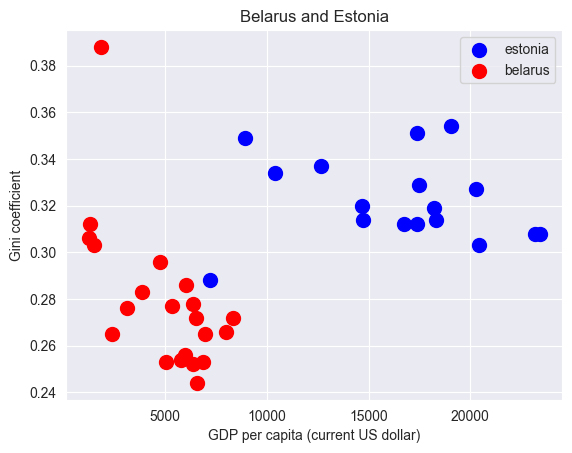

In [253]:
# dots, which shows are estonia is both richer and less equal, interesting
import matplotlib.pyplot as plt

plt.scatter(estonia_filtered['GDP per capita (current US dollar)'], estonia_filtered['Gini coefficient'], c='blue', marker='o', s=100, label='estonia')
plt.scatter(belarus_filtered['GDP per capita (current US dollar)'], belarus_filtered['Gini coefficient'], c='red', marker='o', s=100, label='belarus')

plt.xlabel('GDP per capita (current US dollar)')
plt.ylabel('Gini coefficient')
plt.title('Belarus and Estonia')

plt.legend()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

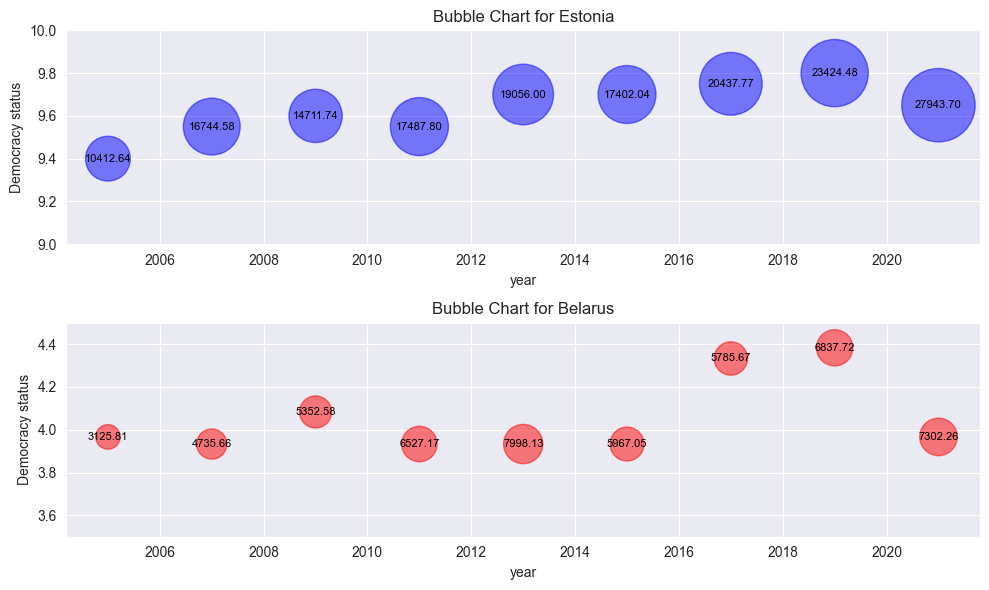

In [254]:
#bubble chart

column1_data = merged_filtered_data['year']
column2_data = merged_filtered_data['Democracy status']
column3_data = merged_filtered_data['GDP per capita (current US dollar)']
column4_data = merged_filtered_data['country']


bubble =  pd.concat([column1_data, column2_data, column3_data, column4_data], axis=1)
bubble = bubble.set_index(['country'])
bubble_sizes = bubble['GDP per capita (current US dollar)'] * 0.1
colors = ['red', 'blue']

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
specific_index_data2 = bubble[bubble.index == 'estonia']
plt.scatter(specific_index_data2['year'], specific_index_data2['Democracy status'], s=bubble_sizes['estonia'], c='blue', alpha=0.5)
plt.ylim(9,10)
plt.xlabel('year')
plt.ylabel('Democracy status')
plt.title('Bubble Chart for Estonia')
for x, y, gdp in zip(specific_index_data2['year'], specific_index_data2['Democracy status'], specific_index_data2['GDP per capita (current US dollar)']):
    plt.annotate(f'{gdp:.2f}', (x, y), ha='center', va='center', fontsize=8, color='black')

plt.subplot(2, 1, 2)
specific_index_data1 = bubble[bubble.index == 'belarus']
plt.scatter(specific_index_data1['year'], specific_index_data1['Democracy status'], s=bubble_sizes['belarus'], c='red',alpha=0.5)
plt.ylim(3.5, 4.5)
plt.xlabel('year')
plt.ylabel('Democracy status')
plt.title('Bubble Chart for Belarus')
for x, y, gdp in zip(specific_index_data1['year'], specific_index_data1['Democracy status'], specific_index_data1['GDP per capita (current US dollar)']):
    plt.text(x, y, f'{gdp:.2f}', ha='center', va='center', fontsize=8, color='black')

plt.tight_layout()

### Trends on other stuff

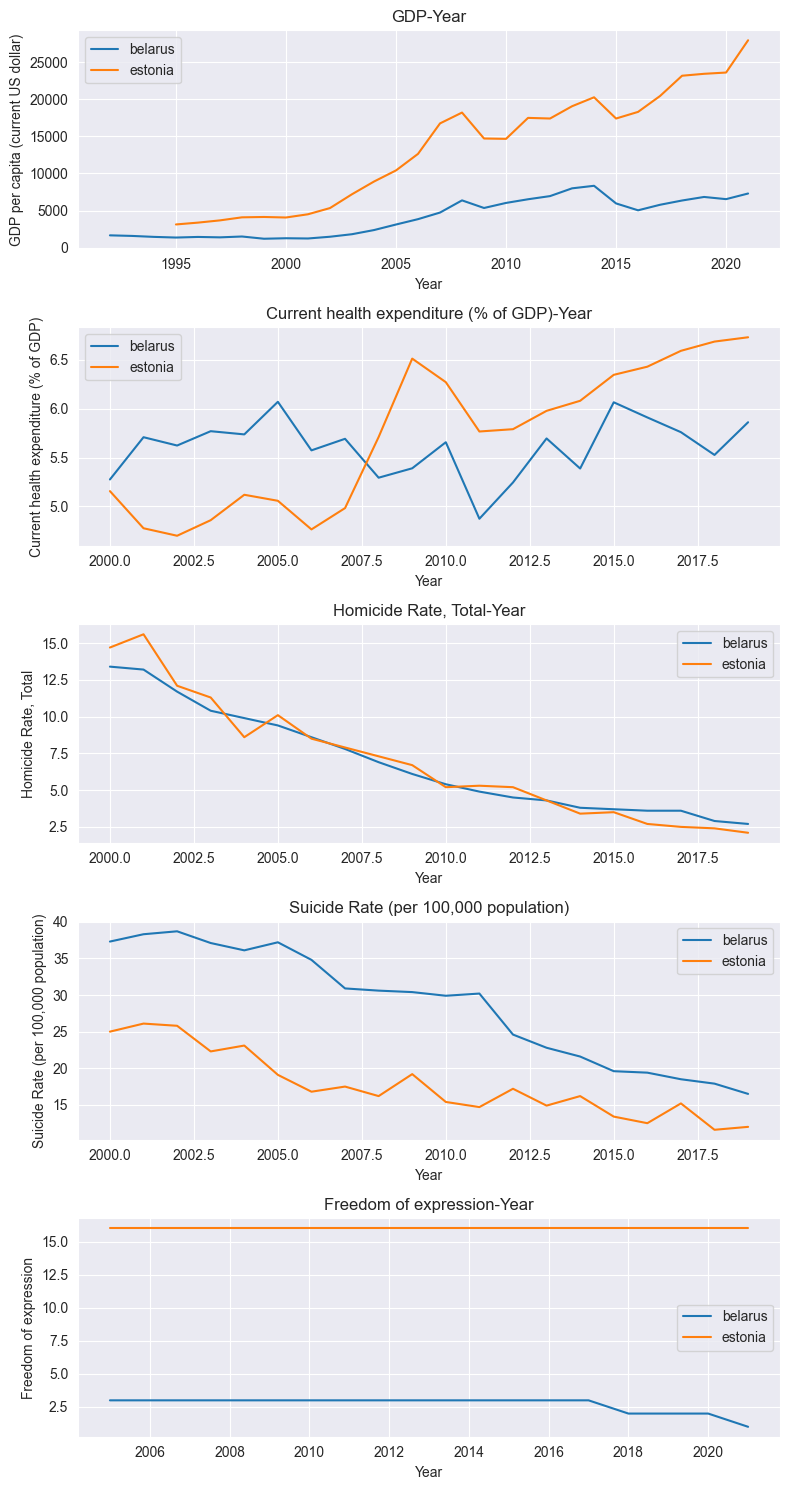

In [255]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 15))

axes[0].plot(belarus_filtered['year'], belarus_filtered['GDP per capita (current US dollar)'], label='belarus')
axes[0].plot(estonia_filtered['year'], estonia_filtered['GDP per capita (current US dollar)'], label='estonia')
axes[0].set_title('GDP-Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP per capita (current US dollar)')
axes[0].legend()

axes[1].plot(belarus_filtered['year'], belarus_filtered['Current health expenditure (% of GDP)'], label='belarus')
axes[1].plot(estonia_filtered['year'], estonia_filtered['Current health expenditure (% of GDP)'], label='estonia')
axes[1].set_title('Current health expenditure (% of GDP)-Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Current health expenditure (% of GDP)')
axes[1].legend()

axes[2].plot(belarus_filtered['year'], belarus_filtered['Homicide Rate, Total'], label='belarus')
axes[2].plot(estonia_filtered['year'], estonia_filtered['Homicide Rate, Total'], label='estonia')
axes[2].set_title('Homicide Rate, Total-Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Homicide Rate, Total')
axes[2].legend()

axes[3].plot(belarus_filtered['year'], belarus_filtered['Suicide Rate (per 100,000 population), Total'], label='belarus')
axes[3].plot(estonia_filtered['year'], estonia_filtered['Suicide Rate (per 100,000 population), Total'], label='estonia')
axes[3].set_title('Suicide Rate (per 100,000 population)')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Suicide Rate (per 100,000 population)')
axes[3].legend()

axes[4].plot(belarus_filtered['year'], belarus_filtered['Freedom of expression'], label='belarus')
axes[4].plot(estonia_filtered['year'], estonia_filtered['Freedom of expression'], label='estonia')
axes[4].set_title('Freedom of expression-Year')
axes[4].set_xlabel('Year')
axes[4].set_ylabel('Freedom of expression')
axes[4].legend()


plt.tight_layout()
plt.show()

# Regression

In [256]:
belarus_gini = belarus_filtered[13:28:2]["Gini coefficient"].values.reshape(-1,1)*100
estonia_gini = estonia_filtered[13:28:2]["Gini coefficient"].values.reshape(-1,1)*100

In [257]:
belarus_demo = belarus_filtered[13:28:2]["Democracy status"].values.reshape(-1,1)
estonia_demo = estonia_filtered[13:28:2]["Democracy status"].values.reshape(-1,1)

# Regression of Democracy status and Gini coefficient

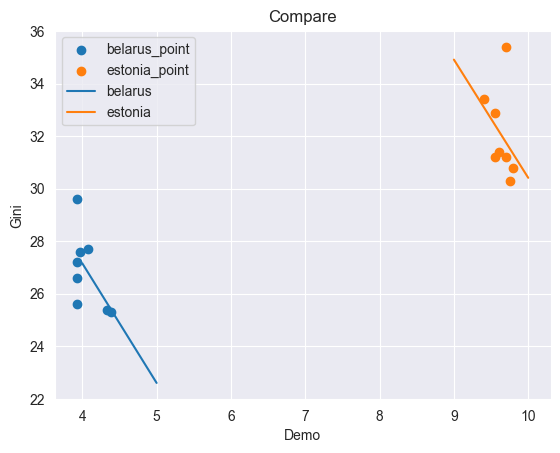

In [258]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
linear_model_belarus_gd = linear_model.LinearRegression()
linear_model_belarus_gd.fit(belarus_demo,belarus_gini)
linear_model_estonia_gd = linear_model.LinearRegression()
linear_model_estonia_gd.fit(estonia_demo,estonia_gini)
belarus_predict_g = linear_model_belarus_gd.predict(np.linspace(4,5,100).reshape(-1,1))
estonia_predict_g = linear_model_estonia_gd.predict(np.linspace(9,10,100).reshape(-1,1))
fig, ax = plt.subplots()
plt.scatter(belarus_demo,belarus_gini,label = "belarus_point")
plt.scatter(estonia_demo,estonia_gini,label = "estonia_point")
ax.plot(np.linspace(4,5,100).reshape(-1,1),belarus_predict_g,label = "belarus")
ax.plot(np.linspace(9,10,100).reshape(-1,1),estonia_predict_g,label = "estonia")
ax.set_xlabel('Demo')
ax.set_ylabel('Gini')
ax.set_title('Compare')
ax.legend()

plt.show()

In [259]:
print(linear_model_belarus_gd.coef_)
print(linear_model_estonia_gd.coef_)

[[-4.5552497]]
[[-4.50131441]]


# Predict Homicide


In [260]:
belarus_dg = belarus_demo/belarus_gini
estonia_dg = estonia_demo/estonia_gini
belarus_ho = belarus_filtered[13:28:2]["Homicide Rate, Total"].values.reshape(-1,1)
estonia_ho = estonia_filtered[13:28:2]["Homicide Rate, Total"].values.reshape(-1,1)
belarus_su = belarus_filtered[13:28:2]["Suicide Rate (per 100,000 population), Total"].values.reshape(-1,1)
estonia_su = estonia_filtered[13:28:2]["Suicide Rate (per 100,000 population), Total"].values.reshape(-1,1)
belarus_gdp = belarus_filtered[13:28:2]["GDP per capita (current US dollar)"].values.reshape(-1,1)
estonia_gdp = estonia_filtered[13:28:2]["GDP per capita (current US dollar)"].values.reshape(-1,1)

In [261]:
# Initialize lasso model
lasso_model = linear_model.Lasso(alpha = 1, max_iter =10000)
lasso_model2 = linear_model.Lasso(alpha = 1, max_iter =10000)
X_belarus = np.concatenate((belarus_demo,belarus_gini,belarus_dg,belarus_gdp),axis = 1)
X_estonia = np.concatenate((estonia_demo,estonia_gini,estonia_dg,estonia_gdp),axis = 1)
# Fit model
lasso_model.fit(X_belarus, belarus_ho)
lasso_model2.fit(X_estonia,estonia_ho)
# Get lasso coefs
print(lasso_model.coef_)
print(lasso_model2.coef_)

[-0.          0.14207888 -0.         -0.00122765]
[-0.          0.         -0.         -0.00065356]


[[ 0.84168605 -0.00088174]] [-12.20143235]
[[ 0.63757057 -0.00147574]] [-6.59124284]


<Figure size 640x480 with 0 Axes>

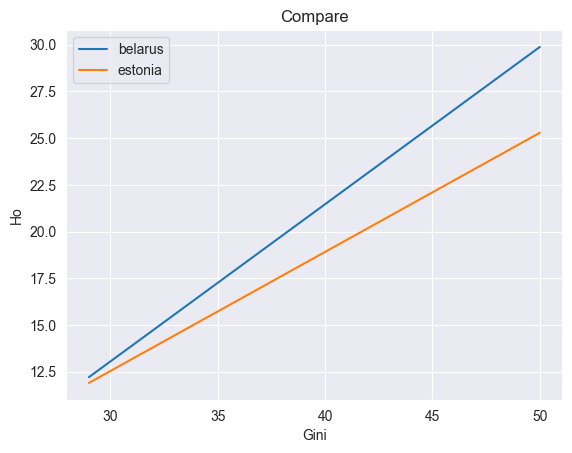

In [262]:
linear_model_homi_belarus = linear_model.LinearRegression()
X_belarus = np.concatenate((belarus_gini,belarus_gdp),axis = 1)
linear_model_homi_belarus.fit(X_belarus,belarus_ho)
linear_model_homi_estonia = linear_model.LinearRegression()
X_estonia = np.concatenate((estonia_gini,belarus_gdp),axis = 1)
linear_model_homi_estonia.fit(X_estonia,belarus_ho)

print(linear_model_homi_belarus.coef_,linear_model_homi_belarus.intercept_)
print(linear_model_homi_estonia.coef_,linear_model_homi_estonia.intercept_)
belarus_predict_g = linear_model_homi_belarus.predict(np.concatenate((np.linspace(0.29,0.50,100).reshape(-1,1)*100,np.zeros((100,1))*10000),axis = 1))
estonia_predict_g = linear_model_homi_estonia.predict(np.concatenate((np.linspace(0.29,0.50,100).reshape(-1,1)*100,np.zeros((100,1))*10000),axis = 1))
plt.clf()
fig, ax = plt.subplots()
ax.plot(np.linspace(29,50,100).reshape(-1,1),belarus_predict_g,label = "belarus")
ax.plot(np.linspace(29,50,100).reshape(-1,1),estonia_predict_g,label = "estonia")
ax.set_xlabel('Gini')
ax.set_ylabel('Ho')
ax.set_title('Compare')
ax.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

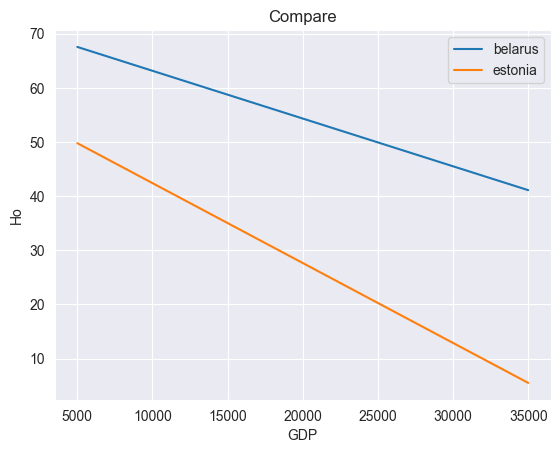

In [263]:
belarus_predict_g = linear_model_homi_belarus.predict(np.concatenate((np.ones((1000,1))*100,np.linspace(5000,35000,1000).reshape(-1,1)),axis = 1))
estonia_predict_g = linear_model_homi_estonia.predict(np.concatenate((np.ones((1000,1))*100,np.linspace(5000,35000,1000).reshape(-1,1)),axis = 1))
plt.clf()
fig, ax = plt.subplots()
ax.plot(np.linspace(5000,35000,1000).reshape(-1,1),belarus_predict_g,label = "belarus")
ax.plot(np.linspace(5000,35000,1000).reshape(-1,1),estonia_predict_g,label = "estonia")
ax.set_xlabel('GDP')
ax.set_ylabel('Ho')
ax.set_title('Compare')
ax.legend()
plt.show()

# Predict Suicide

In [264]:
lasso_model3 = linear_model.Lasso(alpha = 1, max_iter =10000)
lasso_model4 = linear_model.Lasso(alpha = 1, max_iter =10000)
X_belarus = np.concatenate((belarus_demo,belarus_gini,belarus_dg,belarus_gdp),axis = 1)
X_estonia = np.concatenate((estonia_demo,estonia_gini,estonia_dg,estonia_gdp),axis = 1)
# Fit model
lasso_model3.fit(X_belarus, belarus_su)
lasso_model4.fit(X_estonia,estonia_su)
# Get lasso coefs
print(lasso_model3.coef_)
print(lasso_model4.coef_)

[-0.00000000e+00  2.43334476e+00 -0.00000000e+00 -2.26969905e-03]
[-0.         -0.          0.         -0.00056901]


[[ 3.13289826e+00 -1.92382390e-03]] [-47.29284573]
[[ 2.40161862 -0.00414268]] [-27.27820491]


<Figure size 640x480 with 0 Axes>

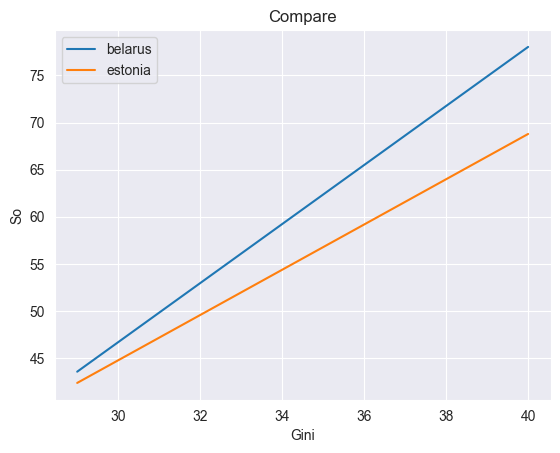

In [265]:
linear_model_su_belarus = linear_model.LinearRegression()
X_belarus = np.concatenate((belarus_gini, belarus_gdp), axis=1)
linear_model_su_belarus.fit(X_belarus, belarus_su)
linear_model_su_estonia = linear_model.LinearRegression()
X_estonia = np.concatenate((estonia_gini, belarus_gdp), axis=1)
linear_model_su_estonia.fit(X_estonia, belarus_su)

print(linear_model_su_belarus.coef_, linear_model_su_belarus.intercept_)
print(linear_model_su_estonia.coef_, linear_model_su_estonia.intercept_)
belarus_predict_g = linear_model_su_belarus.predict(
    np.concatenate((np.linspace(0.29, 0.4, 100).reshape(-1, 1) * 100, np.zeros((100, 1)) * 10000), axis=1))
estonia_predict_g = linear_model_su_estonia.predict(
    np.concatenate((np.linspace(0.29, 0.4, 100).reshape(-1, 1) * 100, np.zeros((100, 1)) * 10000), axis=1))
plt.clf()
fig, ax = plt.subplots()
ax.plot(np.linspace(29, 40, 100).reshape(-1, 1), belarus_predict_g, label="belarus")
ax.plot(np.linspace(29, 40, 100).reshape(-1, 1), estonia_predict_g, label="estonia")
ax.set_xlabel('Gini')
ax.set_ylabel('So')
ax.set_title('Compare')
ax.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

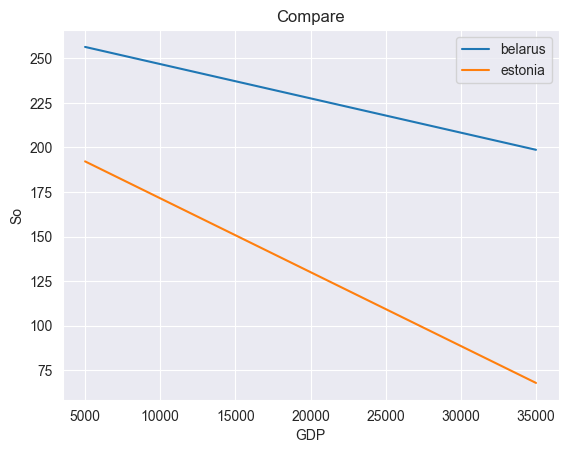

In [266]:
belarus_predict_g = linear_model_su_belarus.predict(np.concatenate((np.ones((1000,1))*100,np.linspace(5000,35000,1000).reshape(-1,1)),axis = 1))
estonia_predict_g = linear_model_su_estonia.predict(np.concatenate((np.ones((1000,1))*100,np.linspace(5000,35000,1000).reshape(-1,1)),axis = 1))
plt.clf()
fig, ax = plt.subplots()
ax.plot(np.linspace(5000,35000,1000).reshape(-1,1),belarus_predict_g,label = "belarus")
ax.plot(np.linspace(5000,35000,1000).reshape(-1,1),estonia_predict_g,label = "estonia")
ax.set_xlabel('GDP')
ax.set_ylabel('So')
ax.set_title('Compare')
ax.legend()
plt.show()

# Predict Life Expectancy

In [267]:
lasso_model5 = linear_model.Lasso(alpha = 1, max_iter =10000)
lasso_model6 = linear_model.Lasso(alpha = 1, max_iter =10000)
X_belarus = np.concatenate((belarus_demo,belarus_gini,belarus_dg,belarus_gdp),axis = 1)
X_estonia = np.concatenate((estonia_demo,estonia_gini,estonia_dg,estonia_gdp),axis = 1)
# Fit model
lasso_model5.fit(X_belarus, belarus_su)
lasso_model6.fit(X_estonia,estonia_su)
# Get lasso coefs
print(lasso_model3.coef_)
print(lasso_model4.coef_)

[-0.00000000e+00  2.43334476e+00 -0.00000000e+00 -2.26969905e-03]
[-0.         -0.          0.         -0.00056901]
